In [17]:
import numpy as np
import pandas as pd
from sklearn import dummy, metrics, model_selection
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
RANDOM_SEED = 257

In [3]:
data = pd.read_csv("data/train.csv")
data.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png


In [4]:
X, y = data.drop(columns=["label"]), data["label"]
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED, stratify=y)

In [5]:
clf = dummy.DummyClassifier()
clf.fit(X_train, y_train)
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

0.2227979274611399

In [6]:
metrics.f1_score(y_val, clf.predict(X_val), average="macro")

0.2222222222222222

In [7]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png


In [8]:
result = pd.DataFrame({"target": clf.predict(test_data)})
result.head()

,target
0,0
1,0
2,0
3,0
4,0


In [9]:
result.to_json("predictions.json", indent=True)

In [13]:
data

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png
...,...,...,...,...,...
1709,0,3.819464,117.636112,2016,train_test_data/train/550.png
1710,0,-1.809594,111.531951,2005,train_test_data/train/2264.png
1711,1,0.443397,112.200163,2012,train_test_data/train/1486.png
1712,2,-1.978349,101.970148,2012,train_test_data/train/1170.png


In [14]:
gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))

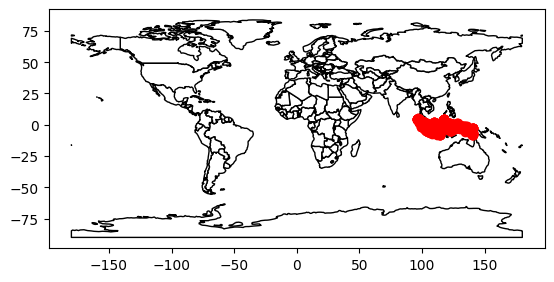

In [18]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
# [world.continent == 'South America']
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [22]:
world.continent

0            Oceania
1             Africa
2             Africa
3      North America
4      North America
           ...      
172           Europe
173           Europe
174           Europe
175    North America
176           Africa
Name: continent, Length: 177, dtype: object